In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import glob

# listar arquivos CSV
csv_files = glob.glob("*.csv")
csv_files


[]

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oleksiimartusiuk/e-commerce-data-shein")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'e-commerce-data-shein' dataset.
Path to dataset files: /kaggle/input/e-commerce-data-shein


In [9]:
df = pd.read_csv('/kaggle/input/e-commerce-data-shein/us-shein-appliances-3987.csv', low_memory=False)
df.head()


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,goods-title-link
0,1pc Rechargeable Deep Tissue Muscle Handheld M...,https://us.shein.com/1pc-Rechargeable-Deep-Tis...,#1 Best Sellers,in Give Gifts,$2.03,-22%,NaN,NaN
1,1pc Portable Hanging Neck Fan,https://us.shein.com/1pc-Portable-Hanging-Neck...,#4 Best Sellers,in Top rated in Portable Fans,$6.48,-20%,NaN,NaN
2,1pc Pink Colored Curved Eyelash Curler False E...,https://us.shein.com/1pc-Pink-Colored-Curved-E...,NaN,NaN,$1.80,NaN,400+ sold recently,NaN
3,1 Mini Portable Handheld Fan With 2 Aa Batteri...,https://us.shein.com/1-Mini-Portable-Handheld-...,NaN,NaN,$0.88,-72%,5.6k+ sold recently,NaN
4,"Wit Water Flosser,Portable Oral Irrigator With...",https://us.shein.com/Wit-Water-Flosser-Portabl...,#6 Best Sellers,in Oral Irrigators,$12.06,-40%,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   goods-title-link--jump       40 non-null     object
 1   goods-title-link--jump href  40 non-null     object
 2   rank-title                   559 non-null    object
 3   rank-sub                     559 non-null    object
 4   price                        3986 non-null   object
 5   discount                     2459 non-null   object
 6   selling_proposition          1361 non-null   object
 7   goods-title-link             3946 non-null   object
dtypes: object(8)
memory usage: 249.3+ KB
None


,count,unique,top,freq
goods-title-link--jump,40,40,1pc Rechargeable Deep Tissue Muscle Handheld M...,1
goods-title-link--jump href,40,40,https://us.shein.com/1pc-Rechargeable-Deep-Tis...,1
rank-title,559,10,#4 Best Sellers,63
rank-sub,559,124,in Hair Dryers,14
price,3986,1512,$2.90,35
discount,2459,80,-28%,272
selling_proposition,1361,64,10+ sold recently,221
goods-title-link,3946,3590,Stay Cool On-The-Go: Small Handheld USB Fan - ...,8


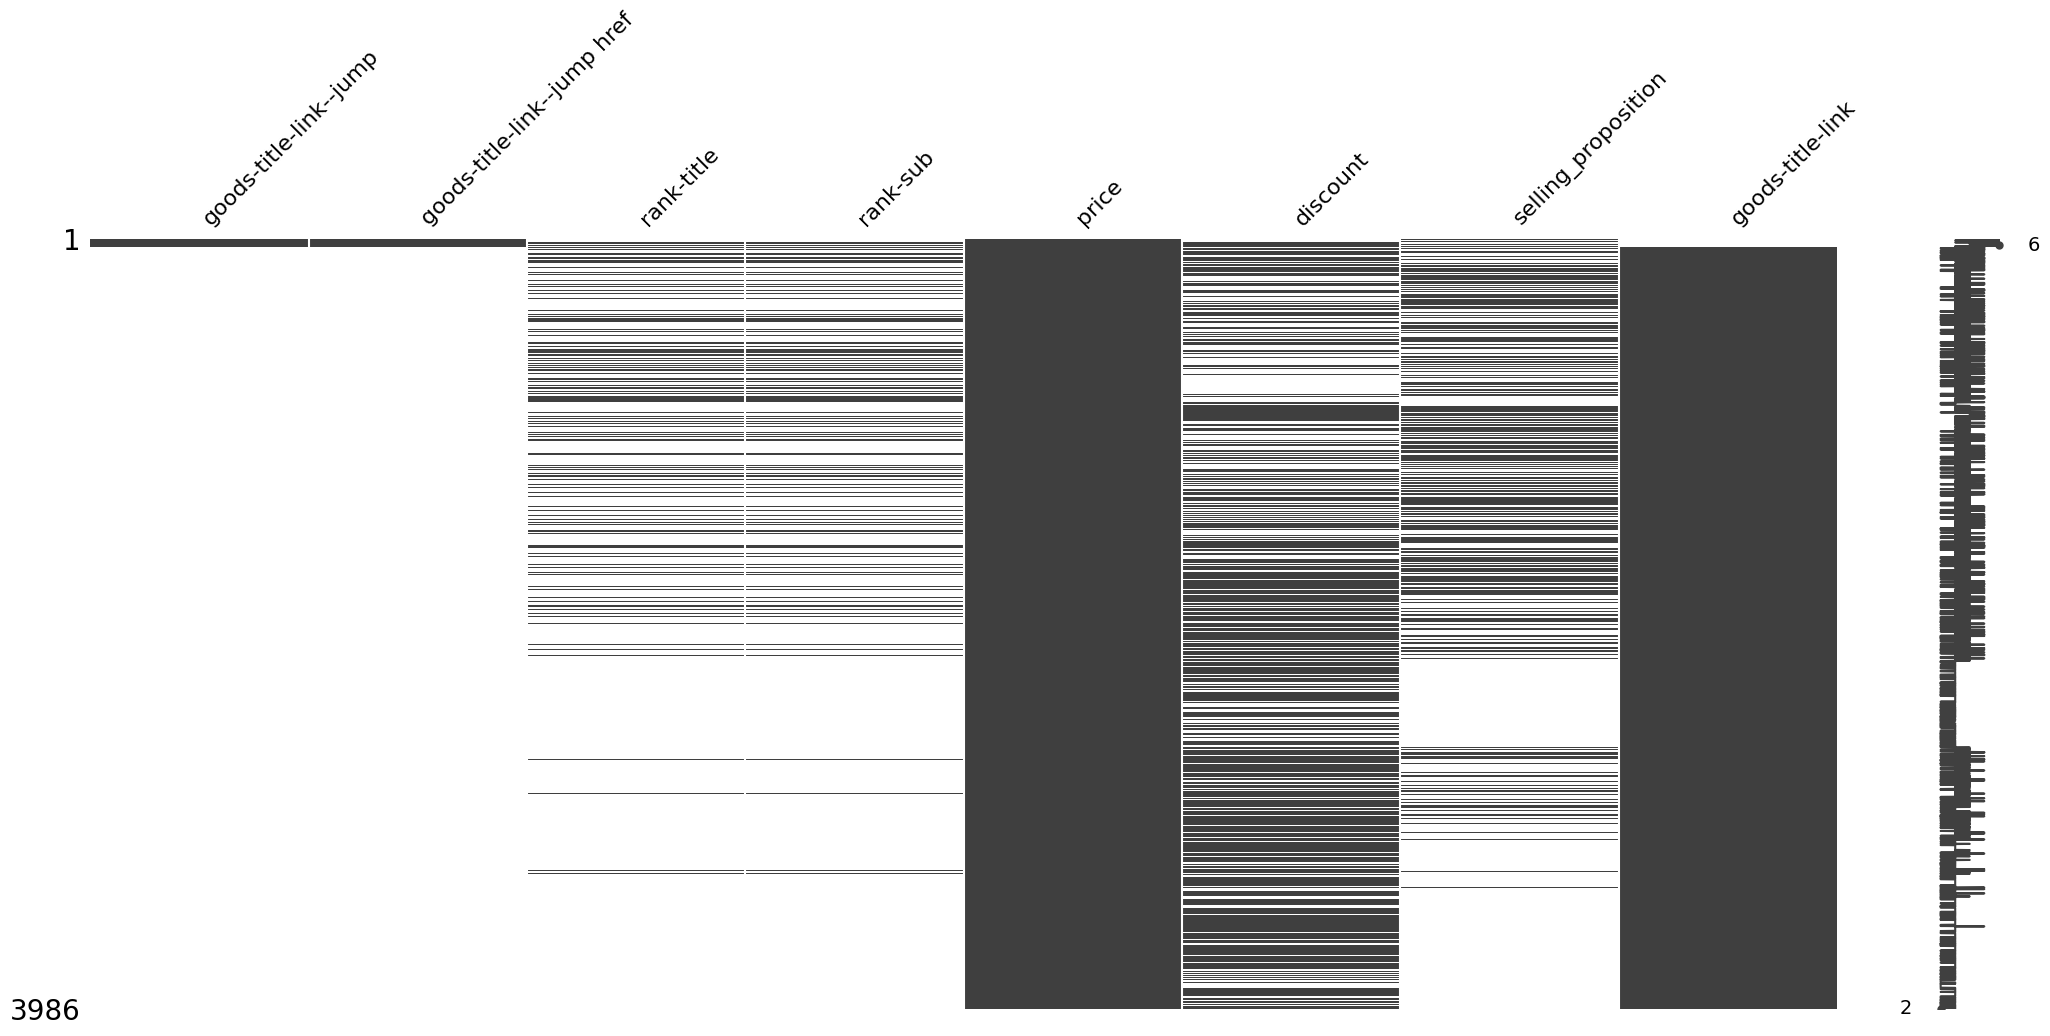

In [10]:
print(df.info())
display(df.describe(include='all').T)

# valores ausentes
df.isnull().sum().sort_values(ascending=False)

# visualizar missing
msno.matrix(df)
plt.show()


In [11]:
# preencher numéricos com mediana
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# preencher textos com "unknown"
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].fillna("unknown")


In [12]:
df = df.drop_duplicates()
df.shape


(3777, 8)

In [13]:
# textos: minúsculas e remover espaços
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# detectar colunas que parecem datas
date_cols = [c for c in df.columns if "date" in c.lower() or "time" in c.lower()]

# converter
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
    except:
        pass


In [14]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr

    df[col] = np.where(df[col] < low, low, df[col])
    df[col] = np.where(df[col] > high, high, df[col])


In [15]:
# comprimento de textos
for col in text_cols:
    df[col+"_len"] = df[col].apply(len)

# decompor datas
for col in date_cols:
    df[col+"_year"] = df[col].dt.year
    df[col+"_month"] = df[col].dt.month
    df[col+"_day"] = df[col].dt.day


In [16]:
print("Linhas:", len(df))
print("Missing total:", df.isnull().sum().sum())
print("Duplicatas:", df.duplicated().sum())

df.describe(include='all').T


Linhas: 3777
Missing total: 0
Duplicatas: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
goods-title-link--jump,3777,41,unknown,3737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goods-title-link--jump href,3777,41,unknown,3737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank-title,3777,11,unknown,3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank-sub,3777,125,unknown,3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,3777,1512,$2.90,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount,3777,81,unknown,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selling_proposition,3777,65,unknown,2425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goods-title-link,3777,3590,unknown,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goods-title-link--jump_len,3777.0,NaN,NaN,NaN,8.41435,15.182109,7.0,7.0,7.0,7.0,300.0
goods-title-link--jump href_len,3777.0,NaN,NaN,NaN,10.975377,38.97171,7.0,7.0,7.0,7.0,538.0


In [19]:
# distribuições das primeiras 5 colunas numéricas
for col in num_cols[:5]:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()
